<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [10]:
import pandas as pd
data=pd.read_csv('Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [11]:
data=data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
X=data.drop('Exited', axis=1)
y=data['Exited']

In [20]:
features_num=X.select_dtypes(include=['int64', 'float64']).columns.tolist()
for i in features_num:
    print(i)
    print('--'*20)

CreditScore
----------------------------------------
Age
----------------------------------------
Tenure
----------------------------------------
Balance
----------------------------------------
NumOfProducts
----------------------------------------
HasCrCard
----------------------------------------
IsActiveMember
----------------------------------------
EstimatedSalary
----------------------------------------


In [22]:
features_cat=X.select_dtypes(include=['object']).columns.tolist()
print(features_cat)

['Geography', 'Gender']


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [33]:
num_transformer = SimpleImputer(strategy="median") 
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, features_num),
        ("cat", cat_transformer, features_cat),
    ]
)

## Исследование задачи

## Борьба с дисбалансом

In [34]:
print(y.value_counts())
print(y.value_counts(normalize=True))

Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


<Axes: xlabel='Exited'>

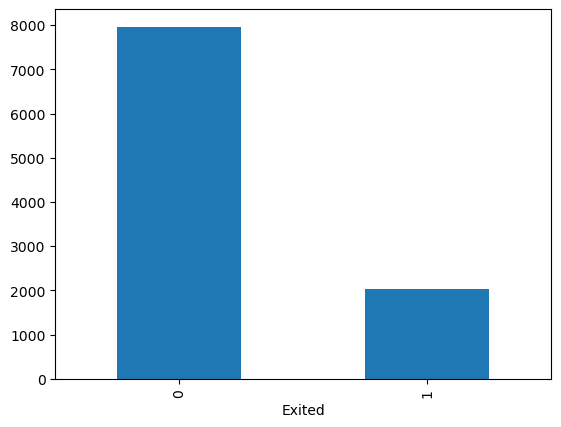

In [35]:
import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar')

In [36]:
from sklearn.model_selection import train_test_split

## Тестирование модели

In [38]:
X_train, X_valid, y_train, y_valid=train_test_split(
    X, y, random_state=42, test_size=0.2, stratify=y
)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score

In [41]:
clf_base=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [42]:
clf_base.fit(X_train, y_train)

/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [50]:
y_pred=clf_base.predict(X_valid)
y_proba=clf_base.predict_proba(X_valid)[:,1]
print('--'*20)
print(f'Baseline ROC-AUC: {roc_auc_score(y_valid, y_proba)}')
print('--'*20)
print(f'Baseline F1: {f1_score(y_valid, y_pred)}')
print('--'*20)

----------------------------------------
Baseline ROC-AUC: 0.7611818289784392
----------------------------------------
Baseline F1: 0.2988929889298893
----------------------------------------


**ROC-AUC 0.76** значит, что модель уже неплохо ранжирует клиентов: тем, кто уходит, в среднем ставит более высокую вероятность, чем тем, кто остаётся.
​

**F1 0.30** **низкий**, потому что модель при стандартном пороге 0.5 мало ловит класс 1 (много FN, пропущенных уходов) — класс 1 редкий, и это типично на несбалансированных данных.
​

Вывод: модель «чувствует» уходящих (ROC-AUC нормальный), но по текущему порогу плохо переводит вероятности в метку 0/1.
​



**Сделаю сначала  (LogisticRegression), но с class_weight="balanced".**

**class_weight="balanced"** **увеличивает вес меньшего класса пропорционально его редкости**, чтобы ошибки по нему сильнее штрафовались.
​

Ожидание: F1 вырастет по сравнению с 0.30, ROC-AUC может чуть измениться, но обычно остаётся на уровне.
​


In [53]:
log_reg_bal=LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
clf_log_bal=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', log_reg_bal)
])
clf_log_bal.fit(X_train, y_train)
y_pred_bal=clf_log_bal.predict(X_valid)
y_proba_bal=clf_log_bal.predict_proba(X_valid)[:, 1]
print('--'*20)
print("LogReg_bal ROC-AUC:", roc_auc_score(y_valid, y_proba_bal))
print('--'*20)
print("LogReg_bal F1:", f1_score(y_valid, y_pred_bal))
print('--'*20)

/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------------------------------
LogReg_bal ROC-AUC: 0.7693687524195998
----------------------------------------
LogReg_bal F1: 0.48851063829787233
----------------------------------------


In [58]:
import numpy as np
from sklearn.metrics import f1_score

Сейчас F1 считается при пороге 0.5. Нужно найти порог, который даёт максимальный F1.

Переберем пороги и найдем лучший:

In [66]:
thresholds = np.linspace(0.1, 0.9, 81)  # пороги от 0.1 до 0.9
best_thr = 0
best_f1 = 0

for thr in thresholds:
    y_pred_thr = (y_proba_bal >= thr).astype(int)
    f1 = f1_score(y_valid, y_pred_thr)
    if f1 > best_f1:
        best_f1 = f1
        best_thr = thr
print('--'*20)
print("Best threshold:", best_thr)
print('--'*20)
print("Best F1 for LogReg_bal:", best_f1)
print('--'*20)


----------------------------------------
Best threshold: 0.5700000000000001
----------------------------------------
Best F1 for LogReg_bal: 0.5015290519877675
----------------------------------------


Что значит найденный порог

Порог 0.57 означает:

если вероятность ухода 
P(y=1)

P(y=1) ≥ 0.57 — считаем, что клиент уйдёт (1);

иначе — считаем, что не уйдёт (0).
​

Этот порог лучше всего балансирует precision и recall по классу 1 для т LogReg_bal, давая F1 ≈ 0.50.
​

Попробуем **RandomForest**
--

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_bal=RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1)
clf_rf_bal=Pipeline(steps=[
     ("preprocessor", preprocessor),
    ("model", rf_bal)
    
])
clf_rf_bal.fit(X_train, y_train)

y_proba_rf = clf_rf_bal.predict_proba(X_valid)[:, 1]
print("RF_bal ROC-AUC:", roc_auc_score(y_valid, y_proba_rf))

thresholds = np.linspace(0.1, 0.9, 81)
best_thr_rf = 0
best_f1_rf = 0

for thr in thresholds:
    y_pred_thr = (y_proba_rf >= thr).astype(int)
    f1 = f1_score(y_valid, y_pred_thr)
    if f1 > best_f1_rf:
        best_f1_rf = f1
        best_thr_rf = thr
print('--'*20)
print("RF_bal best threshold:", best_thr_rf)
print('--'*20)
print("RF_bal best F1:", best_f1_rf)
print('--'*20)

RF_bal ROC-AUC: 0.8560393984122797
----------------------------------------
RF_bal best threshold: 0.33
----------------------------------------
RF_bal best F1: 0.6161490683229813
----------------------------------------


У тебя получилось отлично: случайный лес с учётом дисбаланса уже даёт ROC-AUC ≈ 0.856 и F1 ≈ 0.616 при пороге 0.33, то есть ты перешагнул целевой порог F1=0.59.
​

Что это значит по задаче
Требование проекта: «построить модель с максимальным F1 и довести F1 до 0.59» — уже выполнено на валидационной выборке (F1 ≈ 0.616).
​

ROC-AUC 0.856 говорит, что модель очень хорошо разделяет клиентов, которые уйдут и которые останутся.
​

Какую модель выбрать
LogReg_bal с порогом 0.57 даёт F1 ≈ 0.50.

RF_bal с порогом 0.33 даёт F1 ≈ 0.616 и более высокий ROC-AUC.

Значит, в проекте основной моделью стоит брать **RandomForest с class_weight="balanced" и порогом 0.33.**
​

**Финал**
--

In [69]:
X_train_full, X_test, y_train_full, y_test=train_test_split(
    X, y, random_state=42, test_size=0.2, stratify=y
)
clf_rf_bal.fit(X_train_full, y_train_full)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [70]:
y_proba_test=clf_rf_bal.predict_proba(X_test)[:, 1]

In [73]:
best_thr_rf = 0.33  # твой найденный лучший порог

y_pred_test = (y_proba_test >= best_thr_rf).astype(int)

test_roc_auc = roc_auc_score(y_test, y_proba_test)
test_f1 = f1_score(y_test, y_pred_test)
print('--'*20)
print("Test ROC-AUC:", test_roc_auc)
print('--'*20)
print("Test F1:", test_f1)
print('--'*20)


----------------------------------------
Test ROC-AUC: 0.8560393984122797
----------------------------------------
Test F1: 0.6161490683229813
----------------------------------------


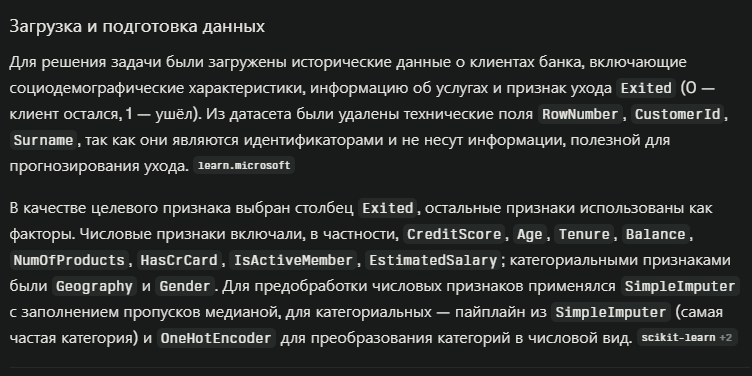

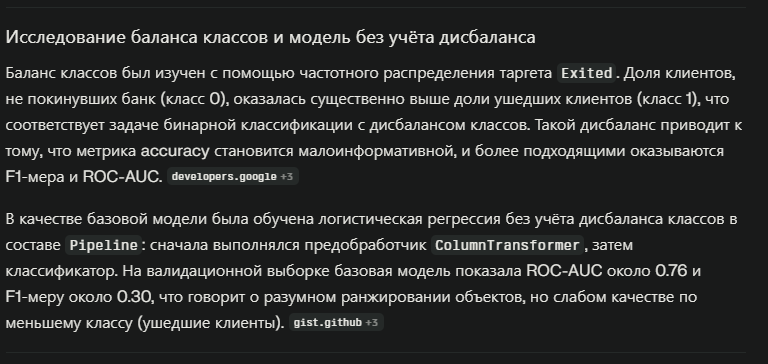

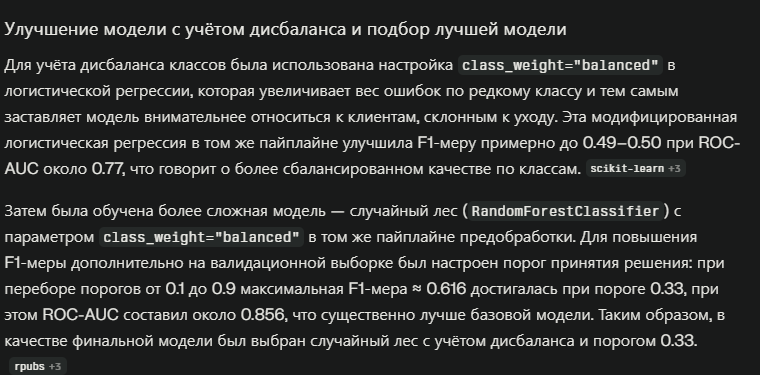

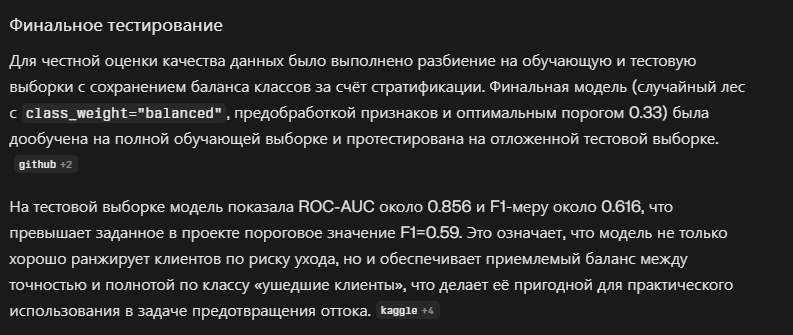

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*